In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")
sns.set_style('whitegrid')
%matplotlib inline
plt.rcParams.update({'font.size': 15})
# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime
import yfinance as yf

In [2]:
# Plot Style
plt.rcParams.update({'font.size': 15})

In [3]:
# Step 1: Download Data
start_date = '2020-01-01'
end_date = '2021-12-31'
dfT=yf.download('TSLA',start_date,end_date)



[*********************100%***********************]  1 of 1 completed


In [4]:
# The  stocks we'll use for this analysis
tech_list = ['HMC', 'TSLA']

# Set up End and Start times for data grab

start = '2020-01-01'
end = '2021-12-31'

#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = yf.download(stock,  start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
company_list = [HMC, TSLA]
company_name = ["Honda", "Tesla"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2020-01-02,28.600000,28.650000,28.459999,28.639999,28.639999,262800,Honda
2020-01-03,28.250000,28.379999,28.080000,28.129999,28.129999,663600,Honda
2020-01-06,27.719999,28.059999,27.719999,28.049999,28.049999,463000,Honda
2020-01-07,28.389999,28.389999,28.180000,28.209999,28.209999,341800,Honda
2020-01-08,27.990000,28.219999,27.990000,28.129999,28.129999,264200,Honda
2020-01-09,28.180000,28.180000,27.950001,28.030001,28.030001,414700,Honda
2020-01-10,27.990000,27.990000,27.690001,27.719999,27.719999,343600,Honda
2020-01-13,27.820000,28.049999,27.750000,28.040001,28.040001,376000,Honda
2020-01-14,27.959999,28.020000,27.860001,27.879999,27.879999,407400,Honda


In [6]:
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,504.000000,504.000000,504.000000,504.000000,504.000000,5.040000e+02
mean,177.639214,181.651050,173.389179,177.824794,177.824794,1.544168e+08
std,98.216133,100.138650,96.135202,98.317714,98.317714,1.143852e+08
min,24.980000,26.990667,23.367332,24.081333,24.081333,2.940180e+07
25%,79.123999,80.322168,77.288334,79.093498,79.093498,7.176938e+07
50%,200.729996,205.563332,197.418327,201.593338,201.593338,1.149472e+08
75%,239.883335,246.039165,236.956669,243.164165,243.164165,2.124330e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [7]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2020-01-02 to 2021-12-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          504 non-null    float64
 1   High          504 non-null    float64
 2   Low           504 non-null    float64
 3   Close         504 non-null    float64
 4   Adj Close     504 non-null    float64
 5   Volume        504 non-null    int64  
 6   company_name  504 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.5+ KB


# Step 2: Visualize Data

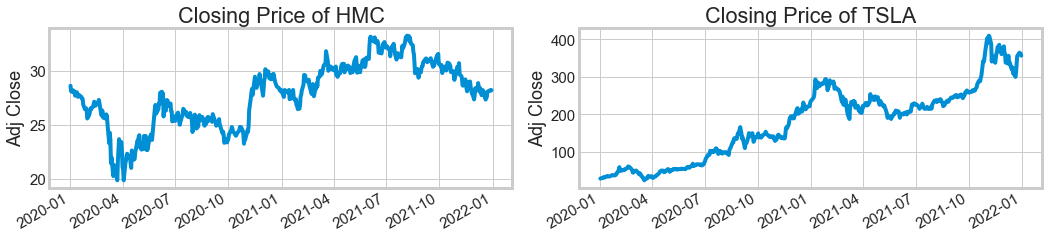

In [8]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

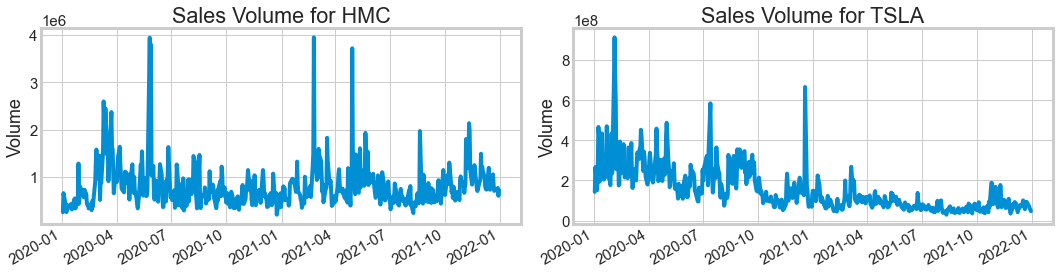

In [9]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

# Prediction using LSTM

In [10]:
# Get the stock quote
df_T = yf.download('TSLA',start,end)
# Show teh data
df_T

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...
2021-12-23,335.600006,357.660004,332.519989,355.666656,355.666656,92713200
2021-12-27,357.890015,372.333344,356.906677,364.646667,364.646667,71145900
2021-12-28,369.829987,373.000000,359.473328,362.823334,362.823334,60324000


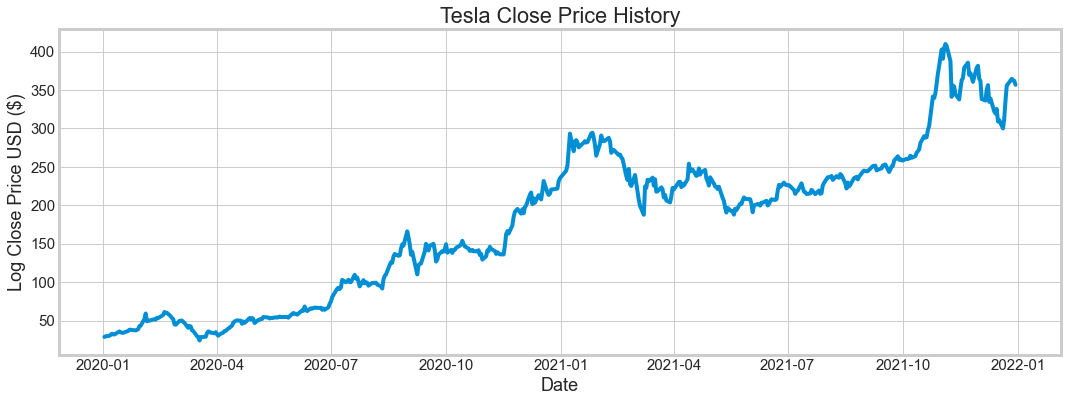

In [11]:
plt.figure(figsize=(16,6))
plt.title('Tesla Close Price History')
plt.plot(df_T['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Log Close Price USD ($)', fontsize=18)
plt.show()

In [12]:
df_T.filter(['Close']).values

array([[ 28.68400002],
       [ 29.5340004 ],
       [ 30.10266685],
       [ 31.27066612],
       [ 32.8093338 ],
       [ 32.08933258],
       [ 31.87666702],
       [ 34.99066544],
       [ 35.86133194],
       [ 34.56666565],
       [ 34.23266602],
       [ 34.03333282],
       [ 36.47999954],
       [ 37.97066879],
       [ 38.14666748],
       [ 37.6546669 ],
       [ 37.20133209],
       [ 37.79333115],
       [ 38.73266602],
       [ 42.72066879],
       [ 43.37133408],
       [ 52.        ],
       [ 59.13733292],
       [ 48.97999954],
       [ 49.93066788],
       [ 49.87133408],
       [ 51.41866684],
       [ 51.62533188],
       [ 51.152668  ],
       [ 53.59999847],
       [ 53.33533478],
       [ 57.2266655 ],
       [ 61.16133118],
       [ 59.96066666],
       [ 60.06666565],
       [ 55.58599854],
       [ 53.32733154],
       [ 51.91999817],
       [ 45.26666641],
       [ 44.53266525],
       [ 49.57466888],
       [ 49.70066833],
       [ 49.96666718],
       [ 48

In [13]:
# Create a new dataframe with only the 'Close column 
data = df_T.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

404

In [14]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01192745],
       [0.01413016],
       [0.01560381],
       [0.01863059],
       [0.02261792],
       [0.0207521 ],
       [0.02020099],
       [0.02827067],
       [0.03052694],
       [0.02717191],
       [0.02630638],
       [0.02578982],
       [0.03213016],
       [0.03599312],
       [0.0364492 ],
       [0.03517422],
       [0.03399944],
       [0.03553356],
       [0.03796777],
       [0.04830237],
       [0.04998851],
       [0.07234902],
       [0.09084485],
       [0.06452293],
       [0.06698651],
       [0.06683275],
       [0.07084254],
       [0.0713781 ],
       [0.07015323],
       [0.07649529],
       [0.07580943],
       [0.08589351],
       [0.09608989],
       [0.09297846],
       [0.09325315],
       [0.08164185],
       [0.07578869],
       [0.0721417 ],
       [0.05490012],
       [0.05299801],
       [0.06606397],
       [0.06639048],
       [0.0670798 ],
       [0.06276767],
       [0.05912932],
       [0.04263406],
       [0.04908324],
       [0.047

In [15]:
scaled_data.shape

(504, 1)

In [16]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01192745, 0.01413016, 0.01560381, 0.01863059, 0.02261792,
       0.0207521 , 0.02020099, 0.02827067, 0.03052694, 0.02717191,
       0.02630638, 0.02578982, 0.03213016, 0.03599312, 0.0364492 ,
       0.03517422, 0.03399944, 0.03553356, 0.03796777, 0.04830237,
       0.04998851, 0.07234902, 0.09084485, 0.06452293, 0.06698651,
       0.06683275, 0.07084254, 0.0713781 , 0.07015323, 0.07649529,
       0.07580943, 0.08589351, 0.09608989, 0.09297846, 0.09325315,
       0.08164185, 0.07578869, 0.0721417 , 0.05490012, 0.05299801,
       0.06606397, 0.06639048, 0.0670798 , 0.06276767, 0.05912932,
       0.04263406, 0.04908324, 0.04716559, 0.03443653, 0.03202997,
       0.01448604, 0.01191708, 0.        , 0.01147481, 0.01145581,
       0.01262368, 0.02483964, 0.03075671, 0.02884079, 0.02645669])]
[0.02434381153066688]

[array([0.01192745, 0.01413016, 0.01560381, 0.01863059, 0.02261792,
       0.0207521 , 0.02020099, 0.02827067, 0.03052694, 0.02717191,
       0.02630638, 0.02578982, 0.03

In [17]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')



In [29]:
# Train the model
dd=model.fit(x_train, y_train, batch_size=1, epochs=1).history
model.summary()

344/344 [==============================] - 6s 19ms/step - loss: 0.0012
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


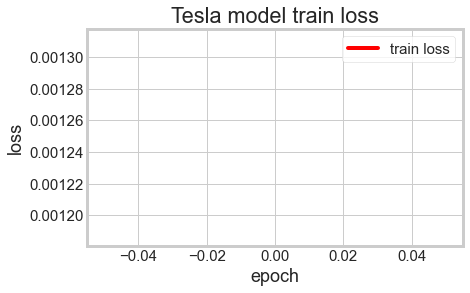

In [30]:
plt.plot(dd['loss'], color = 'red')

plt.title('Tesla model train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss'], loc='upper right')
plt.show()

In [31]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 [==============================] - 0s 13ms/step


25.536875287904202

In [32]:
#Get the root mean squared error (RMSE) for training set

predictions_train = model.predict(x_train)
predictions_train = scaler.inverse_transform(predictions_train)
y_train2 = dataset[60:training_data_len, :]
rmse_train = np.sqrt(np.mean(((predictions_train - y_train2) ** 2)))
rmse_train

11/11 [==============================] - 0s 15ms/step


10.310109801075228

In [33]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(predictions,y_test)
mape = mean_absolute_percentage_error(predictions,y_test)
rmse = np.sqrt(mean_squared_error(predictions,y_test))

print(f'mae - Tesla: {mae}')
print(f'mape - Tesla: {mape}')
print(f'rmse - Tesla: {rmse}')

mae - Tesla: 19.08204895019531
mape - Tesla: 0.06386085513155193
rmse - Tesla: 25.536875287904202


<ipython-input-34-598c5cd764fd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


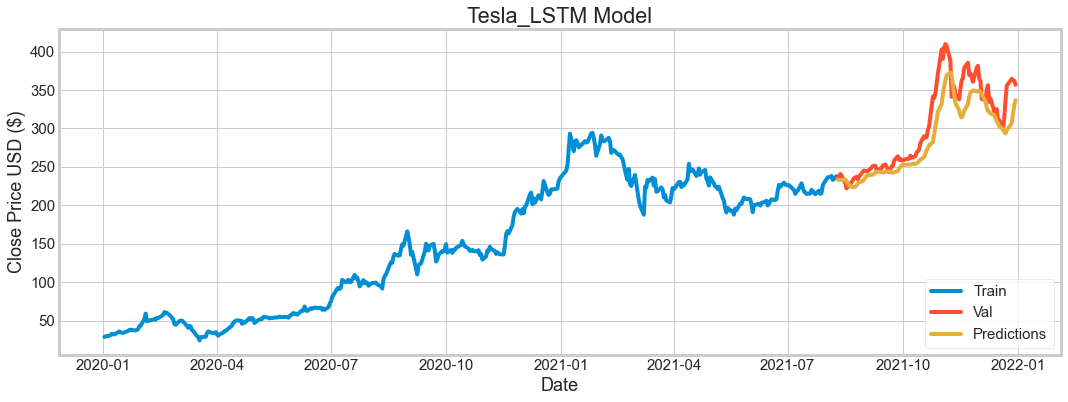

In [34]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Tesla_LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'][:])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [35]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-08-10,236.663330,233.299179
2021-08-11,235.940002,233.306335
2021-08-12,240.750000,232.924438
2021-08-13,239.056671,233.188950
2021-08-16,228.723328,233.419891
...,...,...
2021-12-23,355.666656,297.643707
2021-12-27,364.646667,307.107941
2021-12-28,362.823334,318.995880
